# Attempt 3

* This attempt should take the original csv and preprocess it entirely

In [1]:
import pandas as pd

from preprocess_app_name import preprocess_app_name

train_csv = pd.read_csv("app-rating-competition/train.csv")
test_csv = pd.read_csv("app-rating-competition/test.csv")
sample_submission_csv = pd.read_csv("app-rating-competition/SampleSubmission.csv")

In [2]:
def rename_columns(dataframe):
    reformated_df = dataframe.rename(
        columns={"X0": "app_name", "X1": "app_category", "X2": "reviews_count", "X3": "size",
                 "X4": "installs_count", "X5": "free_paid", "X6": "price_if_paid", "X7": "age_rating",
                 "X8": "app_tags", "X9": "last_updated", "X10": "app_version",
                 "X11": "compatible_os_version"})
    return reformated_df

In [3]:
train_df = rename_columns(train_csv)
train_df

,app_name,app_category,reviews_count,size,installs_count,free_paid,price_if_paid,age_rating,app_tags,last_updated,app_version,compatible_os_version,Y
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8963,FR Forms,BUSINESS,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,NaN
8964,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,4.5
8965,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,5.0
8966,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,NaN


In [4]:
train_df = train_df[train_df['Y'] <= 5]
train_df["Y"].fillna(train_df["Y"].median())

# drop null compatible os version
train_df = train_df[train_df['compatible_os_version'].notnull()]
train_df

,app_name,app_category,reviews_count,size,installs_count,free_paid,price_if_paid,age_rating,app_tags,last_updated,app_version,compatible_os_version,Y
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8961,Chemin (fr),BOOKS_AND_REFERENCE,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,4.8
8962,FR Calculator,FAMILY,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,4.0
8964,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,4.5
8965,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,5.0


In [5]:
train_df = train_df.drop_duplicates()
train_df

,app_name,app_category,reviews_count,size,installs_count,free_paid,price_if_paid,age_rating,app_tags,last_updated,app_version,compatible_os_version,Y
0,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3
3,Paper flowers instructions,ART_AND_DESIGN,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8961,Chemin (fr),BOOKS_AND_REFERENCE,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,4.8
8962,FR Calculator,FAMILY,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,4.0
8964,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,4.5
8965,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,5.0


In [6]:
train_df = train_df.dropna()


## Pipeline

In [7]:
from sklearn.compose import ColumnTransformer
from preprocessing import *

column_transform = ColumnTransformer(
    [
        ("app_name", preprocess_app_name(), ["app_name"]),
        ("app_category", category_pipeline(), ["app_category"]),
        ("reviews", reviews_numerical_pipeline(), ["reviews_count"]),
        ("size", size_pipeline(), ["size"]),
        ("installs", installs_pipeline(), ["installs_count"]),
        ("free_paid", type_pipeline(), ["free_paid"]),
        ("price", price_pipeline(), ["price_if_paid"]),
        ("age_rating", age_rating_pipeline(), ["age_rating"]),
        ("app_tags", app_tags_pipeline(), ["app_tags"]),
        ("last_updated", release_date_pipeline(), ["last_updated"]),
        ("app_version", current_ver_pipeline(), ["app_version"]),
        ("os_version", os_version_pipeline(), ["compatible_os_version"]),
    ],
    remainder="drop",
)

In [8]:
column_transform

ColumnTransformer(transformers=[('app_name',
                                 Pipeline(steps=[('extract_str',
                                                  FunctionTransformer(func=<function preprocess_app_name.<locals>.<lambda> at 0x0000018F4CD62FC0>)),
                                                 ('tfidf',
                                                  TfidfVectorizer(lowercase=False,
                                                                  max_features=5000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  token_pattern=None,
                                                                  tokenizer=<function preprocess_app_name.<locals>._custom_spacy_analyzer at 0x0000018F4C...
                                                  SimpleImputer(strategy='median'))]),
                                 ['app_version']),
                                ('os_version',
                                 Pipeline(steps=[('functiontransformer-1',
                                                  FunctionTransformer(func=<function os_version_pipeline.<locals>.<lambda> at 0x0000018F4D882980>)),
                                                 ('functiontransformer-2',
                                                  FunctionTransformer(func=<function os_version_pipeline.<locals>.<lambda> at 0x0000018F4D882AC0>))]),
                                 ['compatible_os_version'])])

In [9]:
X = train_df.drop(columns=["Y"])
y = train_df["Y"]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% held out for testing
    random_state=42  # for reproducibility
)

## Gradient Boosting

In [11]:
import numpy as np
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
import scipy.stats as stats

# ----- models -----
gbr_base = GradientBoostingRegressor(
    random_state=42,
    n_estimators=200,  # starting default
    max_depth=3,
    learning_rate=0.1
)

gbr_model_transformed = TransformedTargetRegressor(
    regressor=GradientBoostingRegressor(random_state=42),
    func=np.log1p,
    inverse_func=np.expm1
)

pipe = Pipeline([
    ("preprocessing", column_transform),
    ("regression", gbr_model_transformed),
])

# ----- hyper-param space for GBR -----
param_dist = {
    "regression__regressor__n_estimators": stats.randint(100, 1000),
    "regression__regressor__learning_rate": stats.loguniform(0.01, 0.3),
    "regression__regressor__max_depth": stats.randint(2, 8),
    "regression__regressor__subsample": stats.uniform(0.5, 0.5),  # 0.5–1.0
    "regression__regressor__min_samples_split": stats.randint(2, 20),
    "regression__regressor__min_samples_leaf": stats.randint(1, 20),
    "regression__regressor__max_features": ["auto", "sqrt", "log2", None]
}


# custom RMSE scorer (negative for minimization)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


rmse_scorer = make_scorer(rmse, greater_is_better=False)

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=80,
    cv=4,
    scoring=rmse_scorer,
    n_jobs=8,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)


Fitting 4 folds for each of 80 candidates, totalling 320 fits


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
84 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yousi\PycharmProjects\AppRating\.ve

Best params: {'regression__regressor__learning_rate': 0.014316201862826452, 'regression__regressor__max_depth': 5, 'regression__regressor__max_features': None, 'regression__regressor__min_samples_leaf': 12, 'regression__regressor__min_samples_split': 13, 'regression__regressor__n_estimators': 439, 'regression__regressor__subsample': 0.9462794992449889}
Best CV RMSE: 0.4946860190864848


In [12]:
from sklearn.metrics import mean_absolute_error, r2_score

best_pipeline = random_search.best_estimator_

# # Fit on training set
best_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = best_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Test MSE: 0.1967
Test MAE: 0.3227
Test R²: 0.1719


## Random Forest

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute

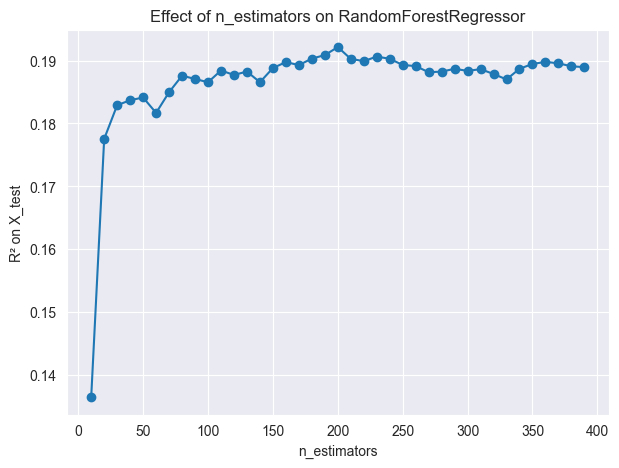

[(10, 0.13644874912288196), (20, 0.17753122643343733), (30, 0.18288882129058515), (40, 0.18368064552962615), (50, 0.18411486383564735), (60, 0.1816662044501468), (70, 0.18495724750793097), (80, 0.18758387146153455), (90, 0.1870644428929641), (100, 0.18654018953154838), (110, 0.18841026901053848), (120, 0.18770415520607597), (130, 0.18824341363789066), (140, 0.18654891461538392), (150, 0.18879713239708562), (160, 0.18974807442932917), (170, 0.1892657777909198), (180, 0.19030861375657526), (190, 0.19085605369557423), (200, 0.1921363831871591), (210, 0.19025713647598907), (220, 0.18989884254200828), (230, 0.19062381947749474), (240, 0.1902740135079214), (250, 0.18929061578663953), (260, 0.18911063318340915), (270, 0.18813817147766532), (280, 0.18823096510093607), (290, 0.18868175555521527), (300, 0.18834718318583066), (310, 0.18862421411520525), (320, 0.1878567575366168), (330, 0.1869890077191786), (340, 0.18868775388146197), (350, 0.18944420415818286), (360, 0.18978762275933136), (370, 0

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# 1) Build a Pipeline with your existing preprocessor + RF
rf_pipe = Pipeline([
    ("preprocessing", column_transform),
    ("regressor", RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 2) Sweep over n_estimators exactly as you did
estimators = np.arange(10, 400, 10)
scores = []

for n in estimators:
    rf_pipe.set_params(regressor__n_estimators=n)
    rf_pipe.fit(X_train, y_train)
    scores.append(rf_pipe.score(X_test, y_test))

# 3) Plot the effect
plt.figure(figsize=(7, 5))
plt.plot(estimators, scores, marker="o")
plt.title("Effect of n_estimators on RandomForestRegressor")
plt.xlabel("n_estimators")
plt.ylabel("R² on X_test")
plt.show()

# 4) Inspect the raw numbers
results = list(zip(estimators, scores))
print(results)

In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on test set
y_pred = rf_pipe.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Test MSE: 0.1927
Test MAE: 0.2942
Test R²: 0.1889


## XGB model

In [15]:
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
import scipy.stats as stats

# ----- models -----
xgb_final = XGBRegressor(
    random_state=42,
    n_estimators=2000,  # large ceiling
    objective='reg:squarederror',
    n_jobs=4,
)

xgb_selector_base = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    n_jobs=4,
)

feature_selector = SelectFromModel(
    estimator=xgb_selector_base,
    threshold="median"
)

xgb_model_transformed = TransformedTargetRegressor(
    regressor=xgb_final,
    func=np.log1p,
    inverse_func=np.expm1
)

pipe = Pipeline([
    ("preprocessing", column_transform),
    ("regression", xgb_model_transformed),
])

# ----- hyper‑param space -----
param_dist = {
    'regression__regressor__max_depth': stats.randint(4, 9),
    'regression__regressor__learning_rate': stats.loguniform(0.02, 0.15),
    'regression__regressor__subsample': stats.uniform(0.6, 0.4),  # 0.6–1.0
    'regression__regressor__colsample_bytree': stats.uniform(0.6, 0.4),
    'regression__regressor__min_child_weight': stats.randint(1, 8),
    'regression__regressor__gamma': stats.uniform(0, 2),
    # lambdas rarely >2 are useful
    'regression__regressor__reg_lambda': stats.loguniform(1e-2, 2),
    # 'regression__regressor__early_stopping_rounds': [50],
    'regression__regressor__eval_metric': ['rmse'],
}


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=100,
    cv=4,
    scoring=mse_scorer,
    n_jobs=8,
    verbose=2,
    random_state=42,
)

random_search.fit(X_train, y_train)

print("Best params:", random_search.best_params_)
print("Best CV RMSE:", -random_search.best_score_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Best params: {'regression__regressor__colsample_bytree': 0.8989883752535026, 'regression__regressor__eval_metric': 'rmse', 'regression__regressor__gamma': 0.0733664057811958, 'regression__regressor__learning_rate': 0.033260424448350236, 'regression__regressor__max_depth': 6, 'regression__regressor__min_child_weight': 7, 'regression__regressor__reg_lambda': 0.8771690856347839, 'regression__regressor__subsample': 0.8998464928034349}
Best CV RMSE: 0.2487742856007804


In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

best_pipeline = random_search.best_estimator_

# # Fit on training set
best_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = best_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Test MSE: 0.1992
Test MAE: 0.3230
Test R²: 0.1615


In [17]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1) Rebuild the LGBM with your best params
lgb_best = LGBMRegressor(
    objective="regression",
    random_state=42,
    n_jobs=4,
    # ← best params from your search:
    n_estimators=603,
    learning_rate=0.06917096611087356,
    num_leaves=147,
    max_depth=3,
    min_child_samples=18,
    min_split_gain=0.16269984907963386,
    subsample=0.7232243167409557,
    colsample_bytree=0.689707723784224,
    reg_alpha=0.0947724465822789,
    reg_lambda=0.07651731056383414
)

# 2) Put it back into your pipeline
pipe_lgb_best = Pipeline([
    ("preprocessing", column_transform),
    ("reg", lgb_best)
])

# 3) Fit on your training split
pipe_lgb_best.fit(X_train, y_train)

y_pred = pipe_lgb_best.predict(X_test)

print("✅ LGB Best on Test Set")
print(f"Test MSE : {mean_squared_error(y_test, y_pred):.4f}")
print(f"Test MAE : {mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test R²  : {r2_score(y_test, y_pred):.4f}")


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 5749, number of used features: 238
[LightGBM] [Info] Start training from score 4.178727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


✅ LGB Best on Test Set
Test MSE : 0.1900
Test MAE : 0.3099
Test R²  : 0.2001


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## LGB Model

In [18]:
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import scipy.stats as stats

# 2) Build the pipeline
lgb = LGBMRegressor(
    objective="regression",
    # device="gpu",
    random_state=42,
    n_jobs=4,
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=8,  # cap tree depth to avoid runaway complexity
    min_child_samples=5,  # allow leaves with as few as 5 rows
    min_split_gain=0.0,  # default: any gain > 0 is OK
    subsample=0.8,  # row subsampling to reduce overfitting
    colsample_bytree=0.8,  # feature subsampling
    reg_alpha=1e-3,
    reg_lambda=1e-3,
)

pipe_lgb = Pipeline([
    ("preprocessing", column_transform),
    ("reg", lgb)
])

# 3) Hyperparameter space
param_dist_lgb = {
    # number of trees: more gives capacity, but costs time
    "reg__n_estimators": stats.randint(100, 1000),
    # lower rates → smoother learning, but need more trees
    "reg__learning_rate": stats.loguniform(0.005, 0.2),
    # leaf complexity: smaller → less overfit
    "reg__num_leaves": stats.randint(20, 150),
    # absolute depth cap (helps on small data)
    "reg__max_depth": stats.randint(3, 12),
    # min data per leaf: larger → simpler trees
    "reg__min_child_samples": stats.randint(5, 50),
    # L2 gain req’d to split (aka gamma)
    "reg__min_split_gain": stats.uniform(0.0, 0.5),

    # row & feature subsampling to reduce overfit
    "reg__subsample": stats.uniform(0.6, 0.4),
    "reg__colsample_bytree": stats.uniform(0.6, 0.4),

    # regularization on leaf weights
    "reg__reg_alpha": stats.loguniform(1e-4, 1.0),
    "reg__reg_lambda": stats.loguniform(1e-4, 1.0),
}


# 4) RMSE scorer
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# 5) Randomized search
lgb_search = RandomizedSearchCV(
    pipe_lgb,
    param_distributions=param_dist_lgb,
    n_iter=100,
    cv=3,
    scoring=mse_scorer,
    n_jobs=8,
    random_state=42,
    verbose=1
)
lgb_search.fit(X_train, y_train)

print("Best LGB params:", lgb_search.best_params_)
print("Best CV RMSE  :", -lgb_search.best_score_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 5749, number of used features: 238
[LightGBM] [Info] Start training from score 4.178727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [19]:
# 6) Evaluate on hold-out
best_lgb = lgb_search.best_estimator_

best_lgb.fit(X_train, y_train)

# Predict on test set
y_pred = best_lgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3127
[LightGBM] [Info] Number of data points in the train set: 5749, number of used features: 238
[LightGBM] [Info] Start training from score 4.178727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Test MSE: 0.1900
Test MAE: 0.3099
Test R²: 0.2001


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## K-Nearest Neighbors Model

The k-nearest neighbors algorithm is based around the simple idea of predicting unknown values by matching them with the most similar known values. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset — its "*nearest neighbors*".

In [20]:
from sklearn.neighbors import KNeighborsRegressor

# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [21]:
# Find the mean accuracy of knn regression using X_test and y_test
knn_pipe = Pipeline([
    ("preprocessing", column_transform),
    ("regressor", model)
])
knn_pipe.fit(X_train, y_train)

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('app_name',
                                                  Pipeline(steps=[('extract_str',
                                                                   FunctionTransformer(func=<function preprocess_app_name.<locals>.<lambda> at 0x0000018F4CD62FC0>)),
                                                                  ('tfidf',
                                                                   TfidfVectorizer(lowercase=False,
                                                                                   max_features=5000,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   token_pattern=None,
                                                                                   tokenizer=<function preprocess_app_name.<locals>._cu...
                                                 ('os_version',
                                                  Pipeline(steps=[('functiontransformer-1',
                                                                   FunctionTransformer(func=<function os_version_pipeline.<locals>.<lambda> at 0x0000018F4D882980>)),
                                                                  ('functiontransformer-2',
                                                                   FunctionTransformer(func=<function os_version_pipeline.<locals>.<lambda> at 0x0000018F4D882AC0>))]),
                                                  ['compatible_os_version'])])),
                ('regressor', KNeighborsRegressor(n_neighbors=15))])

In [22]:
# Calculate the mean accuracy of the KNN model
accuracy = knn_pipe.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy * 100, 2)) + '%'

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


'Accuracy: -5.23%'

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute

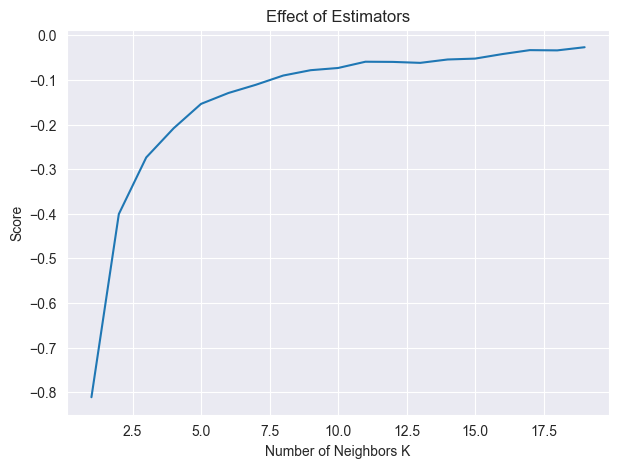

In [23]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    knn_pipe.set_params(regressor__n_neighbors=n)
    knn_pipe.fit(X_train, y_train)
    scores.append(knn_pipe.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [24]:
from sklearn import metrics

predictions = knn_pipe.predict(X_test)
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


('Mean Squared Error:', 0.2439325933602765)

## Random Forest Model

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest.

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(n_jobs=4, random_state=42)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 300, 10)
scores = []

rnf_model_transformed = TransformedTargetRegressor(
    regressor=model,
    func=np.log1p,
    inverse_func=np.expm1
)

rnff_pipe = Pipeline([
    ("preprocessing", column_transform),
    ("regressor", model),
])

param_grid = {"regressor__n_estimators": [180]}

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid = GridSearchCV(
    rnff_pipe,
    param_grid,
    cv=3,
    scoring=mse_scorer,
    n_jobs=8,
    verbose=2
)
grid.fit(X_train, y_train)

print("Best mse  :", -grid.best_score_)
print("Best params:", grid.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Best mse  : 0.24264166226366024
Best params: {'regressor__n_estimators': 180}


In [27]:
from sklearn import metrics

best_pipeline = grid.best_estimator_

predictions = best_pipeline.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


('Mean Absolute Error:', 0.29465152217586127)

In [28]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.19236244741496247)

In [29]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.43859143563795505)

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Predict on test set
y_pred = best_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Test MSE: 0.1924
Test MAE: 0.2947
Test R²: 0.1903


## Stacked

In [31]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1) Extract the “pure” regressors from your tuned pipelines:

# LightGBM regressor
lgb_reg = pipe_lgb_best.named_steps["reg"]
# RandomForest regressor
rf_reg = grid.best_estimator_.named_steps["regressor"]
# XGB (wrapped in TransformedTargetRegressor)
xgb_ttr = random_search.best_estimator_.named_steps["regression"]
# if you want to strip off the log1p wrapper and stack raw XGB, use:
#    xgb_reg = xgb_ttr.regressor

# 2) Define your stacking estimator
stack = StackingRegressor(
    estimators=[
        ("lgbm", lgb_reg),
        ("rf", rf_reg),
        ("xgb", xgb_ttr)  # or xgb_reg if you unwrapped it
    ],
    final_estimator=RidgeCV(alphas=[0.1, 1.0, 10.0]),
    cv=4,
    n_jobs=8,
    passthrough=False
)

# 3) Wrap into one pipeline with **one** preprocessing step
stacking_pipe = Pipeline([
    ("preprocessing", column_transform),
    ("stack", stack),
])

# 4) Fit & evaluate
stacking_pipe.fit(X_train, y_train)

y_pred_stack = stacking_pipe.predict(X_test)

print("Stacked Test MSE :", mean_squared_error(y_test, y_pred_stack))
print("Stacked Test MAE :", mean_absolute_error(y_test, y_pred_stack))
print("Stacked Test R²  :", r2_score(y_test, y_pred_stack))


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Stacked Test MSE : 0.18287948080043792
Stacked Test MAE : 0.3011871669349308
Stacked Test R²  : 0.23022428590047872


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [32]:
# 5) Re-train on the combined training + hold-out
X_full = pd.concat([X_train, X_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

stacking_pipe.fit(X_full, y_full)

y_pred_full = stacking_pipe.predict(X_test)

print("Retrained Stacked Test MSE :", mean_squared_error(y_test, y_pred_full))
print("Retrained Stacked Test MAE :", mean_absolute_error(y_test, y_pred_full))
print("Retrained Stacked Test R²  :", r2_score(y_test, y_pred_full))

C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


Retrained Stacked Test MSE : 0.07416821819169996
Retrained Stacked Test MAE : 0.19331222616904292
Retrained Stacked Test R²  : 0.6878113778969771


C:\Users\yousi\PycharmProjects\AppRating\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [29]:

sample_submission_csv["Y"] = y_pred_full

sample_submission_csv.to_csv("stacked_nlp_try2.csv", index=False)

print("✅ submission.csv created successfully with row_id and rounded Y.")

✅ submission.csv created successfully with row_id and rounded Y.
